In [1]:
import sys
import numpy as np

import plotly
import plotly.offline as offline
import plotly.graph_objs as go
plotly.offline.init_notebook_mode()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


### 2次関数, 3次関数, sin波の微分
sympyを利用

/mnt/c/Git/go/anaconda3/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:372: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




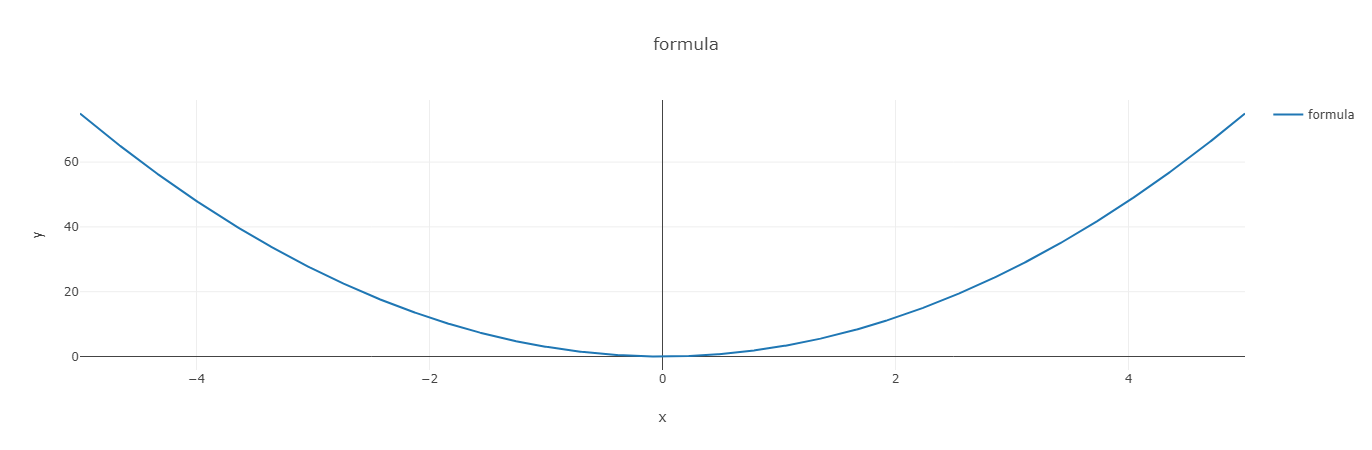

In [5]:
# 変数シンボルの定義
import sympy as sym
(x, y) = sym.symbols('x y')

# 2次関数
def f2():
    return x**2

# 3次関数
def f3():
    return x**3

# sin波
def sin():
    return sym.sin(x)

X = np.linspace(-5, 5, 1000)
Y = np.array([])

# 微分
is_differential = [True, False][0]
for i in X:
    if is_differential:
        Y = np.append(Y, float(sym.diff(f3(), x, 1).subs(x, i)))
    else:
        Y = np.append(Y, float(sin().subs(x, i)))
    
    
#========================================================================
# Plotlyによる描画
#========================================================================
name = 'formula'
title = 'formula'
trace = go.Line(
    x = X,
    y = Y,
    name = name
)

layout = go.Layout(
    title=title,
#     legend={"x":0.8, "y":0.1},
    xaxis={"title":"x"},
    yaxis={"title":"y"},
    showlegend=True
#     yaxis2={"title":"Birth Rate", "overlaying":"y", "side":"right"},
)

data = [trace]
fig = {'data':data, 'layout':layout}
offline.iplot(fig, filename='sin', image="png")

/mnt/c/Git/go/anaconda3/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:372: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




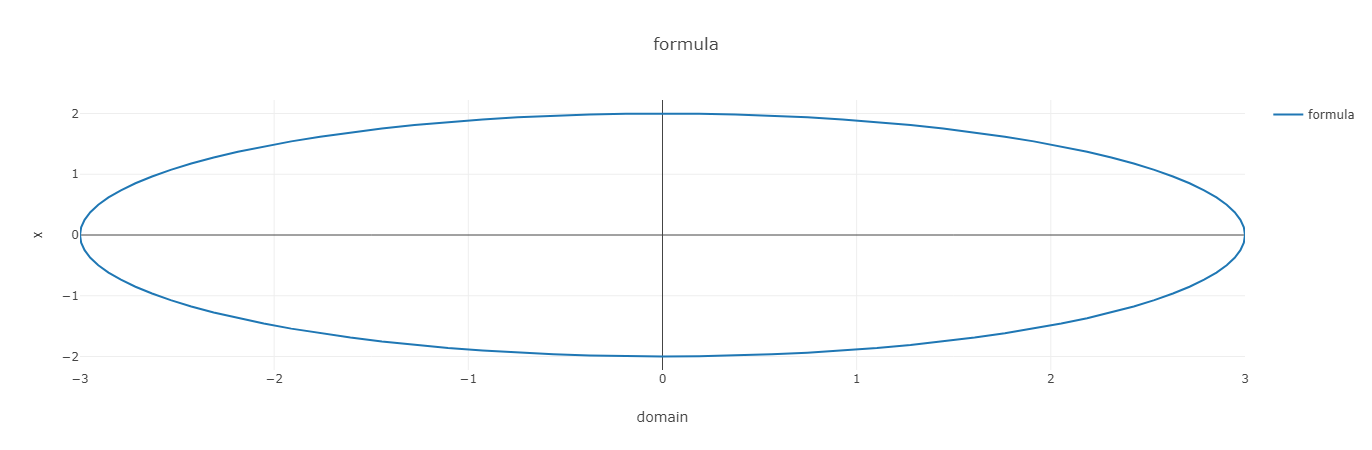

In [35]:
# 2次関数
def f2(xy):
    x = xy[0]
    y = xy[1]
    f = x**2+y**2
    if f==1:
        return 1
    else:
        return 0
    
xs = np.linspace(-2, 2, 1000)
ys = np.linspace(-2, 2, 1000)
xmesh, ymesh = np.meshgrid(xs, ys)
xmesh = xmesh.reshape(1, -1)[0]
ymesh = ymesh.reshape(1, -1)[0]


import math

def generateVecFromEllipse(a, b):
  
    t = np.linspace(0, 2 * math.pi, 101) 
    t = np.reshape(t, (t.shape[0], 1))
    
    xVec = np.zeros((t.shape))
    yVec = np.zeros((t.shape))
    for i in range(t.shape[0]):
        xVec[i] = a * math.cos(t[i])
        yVec[i] = b * math.sin(t[i])
    
    data = np.concatenate((xVec, yVec),  axis=1)
    return data
  
# 1. Generating Ellipse Point
dataEl = generateVecFromEllipse(3, 2)


# # 微分
# is_differential = [True, False][0]
# for i in X:
#     if is_differential:
#         Y = np.append(Y, float(sym.diff(f3(), x, 1).subs(x, i)))
#     else:
#         Y = np.append(Y, float(sin().subs(x, i)))
    
    
#========================================================================
# Plotlyによる描画
#========================================================================
name = 'formula'
title = 'formula'
trace = go.Line(
    x = dataEl[:, 0],
    y = dataEl[:, 1],
    name = name
)

layout = go.Layout(
    title=title,
#     legend={"x":0.8, "y":0.1},
    xaxis={"title":"x"},
    yaxis={"title":"y"},
    showlegend=True
#     yaxis2={"title":"Birth Rate", "overlaying":"y", "side":"right"},
)

data = [trace]
fig = {'data':data, 'layout':layout}
offline.iplot(fig, filename='sin', image="png")

### 勾配

In [36]:
import numpy as np
import matplotlib.pyplot as plt

class GradientDescent:
    def __init__(self, f, df, alpha=0.01, eps=1e-6):
        self.f = f
        self.df = df
        self.alpha = alpha
        self.eps = eps
        self.path = None
        
    def solve(self, init):
        x = init
        path = []
        grad = self.df(x)
        path.append(x)
        # 傾きのノルム二乗値がeps**2より大きい限り探索を続ける
        while (grad**2).sum() > self.eps**2:
            x = x - self.alpha * grad
            grad = self.df(x)
            path.append(x)
        # 通ったルート
        self.path = np.array(path)
        # 最適値
        self.x_ = x
        self.opt_ = self.f(x)
        
import sympy as sym
from sympy import var

var(x, y)

SystemExit: 

/mnt/c/Git/go/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2870: UserWarning:

To exit: use 'exit', 'quit', or Ctrl-D.



### テイラー展開